In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Initialization***

In [170]:
# Importing some library files...
import sklearn
import pandas as pd
import numpy as np
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from pandas.core.dtypes.common import is_numeric_dtype
import pickle
from google.colab import files
import warnings as wr
wr.filterwarnings('ignore')

# Importing ALL THE MODELS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

# Importing evaluation metrics
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [171]:
# Fetching the Dataset for training...
path = "/content/drive/MyDrive/Colab Notebooks/linkdin_Job_data3000.csv"
df = pd.read_csv(path)
print(len(df))
df.head()

3000


,job,work_type,job_details
0,Governance Support Analyst,Hybrid,About the job Governance Support Analyst Havin...
1,Data Engineer,Hybrid,About the job We are seeking a highly motivate...
2,Data Engineer,On-site,About the job Do you love solving real-world d...
3,FE lead,On-site,About the job Your Responsibilities:You will d...
4,Data Engineer,On-site,About the job Job descriptionGreetings from As...


In [ ]:
target = 'job'

# ***Dataset Preprocessing***

In [172]:
# Dropping Nulls
df = df.dropna()

In [173]:
# Dataset Cleaning
def clean_class_name(class_name):
    class_name = class_name.split(',')[0]
    class_name = class_name.split(' -')[0]
    class_name = class_name.split('|')[0]
    class_name = class_name.split('(')[0]
    return class_name.strip()  # Strip to remove leading/trailing spaces

df[target] = df[target].apply(clean_class_name)

In [174]:
# Count occurrences of each class in the 'Class' column
class_counts = df[target].value_counts()

# Get the classes with low number of members
classes_to_drop = class_counts[class_counts <= 3].index

# Filter the DataFrame based on classes to drop
df = df[~df[target].isin(classes_to_drop)]
print(len(df))

1224


In [175]:
# Checking sample count for each class
class_counts =df[target].value_counts()
sorted_classes = class_counts.sort_values(ascending=False)

# Print unique classes and their counts in descending order
print("Unique classes in descending order of count:")
for class_label, count in sorted_classes.items():
    print(f"Class: {class_label}, Count: {count}")

Unique classes in descending order of count:
Class: Lead Java Software Engineer, Count: 65
Class: Senior Automation Tester, Count: 61
Class: Data Engineer, Count: 60
Class: Business Analyst, Count: 60
Class: Lead Automation Tester, Count: 41
Class: Data Analyst, Count: 40
Class: Lead Java Developer, Count: 36
Class: Senior Java Software Engineer, Count: 36
Class: Python Developer, Count: 34
Class: Senior ReactJS Developer, Count: 28
Class: Salesforce Developer, Count: 28
Class: PL/SQL Developer, Count: 26
Class: Senior Data Engineer, Count: 26
Class: Data Scientist, Count: 24
Class: Senior Test Automation Engineer, Count: 23
Class: Lead .NET Developer, Count: 23
Class: Human Resources Intern, Count: 21
Class: Azure Data Engineer, Count: 19
Class: C Developer, Count: 17
Class: Senior Developer, Count: 17
Class: GCP Data Engineer, Count: 15
Class: Lead Test Automation Engineer, Count: 15
Class: Java Team Lead, Count: 15
Class: Big Data Developer, Count: 15
Class: Senior C++ Engineer, Cou

In [176]:
skills = [
    "python", "sql", "aws", "data analysis", "communication", "financial analysis", "recruiting",
    "training", "performance management", "advertising", "tableau", "marketing", "excel",
    "sales", "digital marketing", "css", "project management", "html", "writing",
    "content creation", "sem", "social media", "javascript", "erp", "critical thinking",
    "analytics", "crm", "research", "seo", "design", "artificial intelligence",
    "machine learning", "compliance", "accounting", "forecasting", "leadership",
    "audit", "risk management", "legal", "budgeting", "databases", "teamwork", "java",
    "linux", "windows", "network security", "agile", "scrum", "spring", "hibernate",
    "supply chain", "logistics", "operations management", "negotiation", "cisco",
    "quality assurance", "human resources", "business development", "c++", "git",
    "data science", "big data", "deep learning", "hadoop", "spark", "etl",
    "data warehousing", "mysql", "sql server", "docker", "kubernetes", "ci/cd",
    "jenkins", "electrical engineering", "autocad", "matlab", "power systems", "circuit design",
    "organizational skills", "administrative skills", "microsoft office", "react", "angular",
    "web development", "ux/ui design", "safety", "compliance", "auditing", "environmental health",
    "process improvement", "lean manufacturing", "six sigma", "interior design", "3d modeling",
    "photoshop", "financial analysis", "investment strategies", "economics", "troubleshooting",
    "itil", "hardware support", "laboratory skills", "quality control", "chemistry", "biology",
    "instrumentation", "legal research", "transportation management", "planning", "pharmaceutical industry",
    "medical knowledge", "patient care", "healthcare", "time management", "organization",
    "legal documentation", "prototyping", "product development", "creativity", "technical documentation",
    "graphic design", "user research", "fabrication", "metalworking", "blueprint reading",
    "mig/tig welding", "yoga teaching", "fitness", "health and wellness", "flexibility training"
]

skills = list(set(skills))

for skill in skills:
    tmplist = []
    for detail in df["job_details"]:
      tmptext = detail.lower().translate(str.maketrans('', '', string.punctuation)).split(' ')
      flag=0;
      for word in tmptext:
        if word == skill:
          flag=1
          break
      tmplist.append(flag)
    df[skill]=tmplist

In [177]:
df = df.drop("job_details", axis=1)
le = LabelEncoder()
df['work_type'] = le.fit_transform(df['work_type'])
df.tail()

,job,work_type,analytics,photoshop,sql server,tableau,administrative skills,troubleshooting,data science,python,...,itil,seo,interior design,economics,3d modeling,sales,research,databases,pharmaceutical industry,content creation
2988,PL/SQL Developer,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2989,Python Developer,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2992,Senior Automation Tester,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2994,Senior Build Engineer,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2995,Senior Developer,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
y = df[target]
X = df.drop(target, axis=1)
X.describe()

,work_type,analytics,photoshop,sql server,tableau,administrative skills,troubleshooting,data science,python,graphic design,...,itil,seo,interior design,economics,3d modeling,sales,research,databases,pharmaceutical industry,content creation
count,1224.000000,1224.000000,1224.000000,1224.0,1224.000000,1224.0,1224.000000,1224.0,1224.000000,1224.0,...,1224.000000,1224.000000,1224.0,1224.000000,1224.0,1224.000000,1224.000000,1224.000000,1224.0,1224.0
mean,1.419118,0.127451,0.000817,0.0,0.035131,0.0,0.037582,0.0,0.247549,0.0,...,0.001634,0.010621,0.0,0.009804,0.0,0.066176,0.051471,0.092320,0.0,0.0
std,0.730143,0.333614,0.028583,0.0,0.184185,0.0,0.190260,0.0,0.431765,0.0,...,0.040406,0.102551,0.0,0.098568,0.0,0.248692,0.221046,0.289596,0.0,0.0
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,2.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
75%,2.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
max,2.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0


In [179]:
# Splitting Data into Train and Test Sets...
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=SEED)

In [180]:
# print(df.isnull().sum())
print(len(skills))
# print(len(filtered_X))
# print(len(filtered_y))
print(len(y.unique()))
print(len(y_train.unique()))
print(len(y_test.unique()))

128
103
103
103


In [181]:
X_test2 = X_test[:1]
X_test2

,work_type,analytics,photoshop,sql server,tableau,administrative skills,troubleshooting,data science,python,graphic design,...,itil,seo,interior design,economics,3d modeling,sales,research,databases,pharmaceutical industry,content creation
559,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
#lists initiated that will contain the name of the models and their respective metrics
names = []
scores = []
cross_scores = []
f1=[]
pr=[]

# ***KNN***

In [183]:
classifier = KNeighborsClassifier() # n_neighbors = 5
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# y_pred

In [184]:
y_pred2 = classifier.predict(X_test2)
y_pred2

array(['Python Developer'], dtype=object)

In [185]:
# Evaluating KNN for Classification...
acc =  classifier.score(X_test, y_test)
print(acc)

0.3888888888888889


Text(0, 0.5, 'F1 Score')

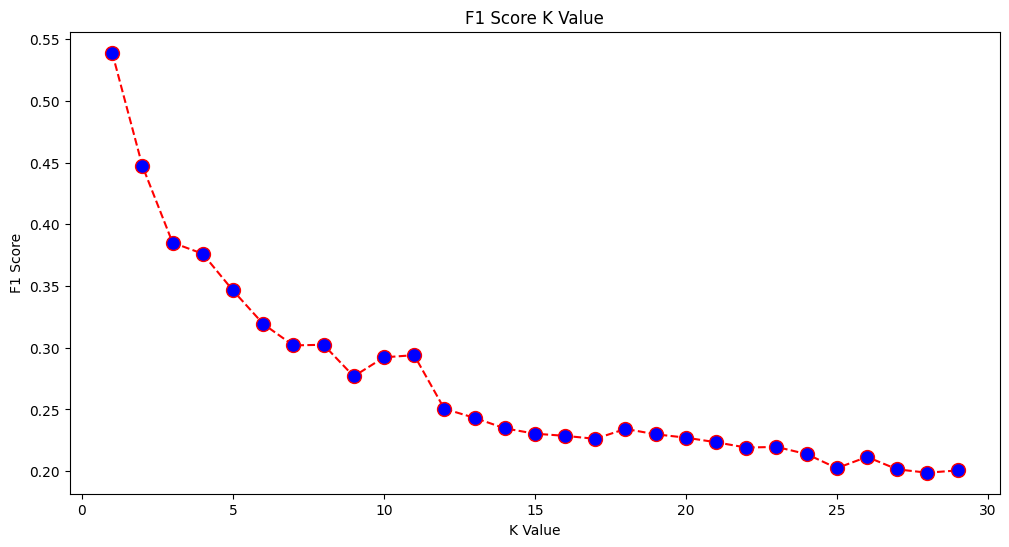

In [186]:
# ============================================
# Finding the Best K for KNN Classification...
# ============================================

f1s_KNN = []

# Calculating f1 score for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # average='weighted' to calculate a weighted average for the classes
    f1s_KNN.append(f1_score(y_test, pred_i, average='weighted'))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), f1s_KNN, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [187]:
# The f1-score is the highest when the value of the K is...
# Retrain the classifier with best k neighbors...
classifier_best = KNeighborsClassifier(n_neighbors=5)
classifier_best.fit(X_train, y_train)
y_pred_best = classifier_best.predict(X_test)
#print(classification_report(y_test, y_pred_best))

In [188]:
y_pred2_best = classifier_best.predict(X_test2)
y_pred2_best

array(['Python Developer'], dtype=object)

In [189]:
# Evaluating KNN for Classification...
acc =  classifier_best.score(X_test, y_test)
print(acc)

0.3888888888888889


In [190]:
knn_acc = accuracy_score(y_test, y_pred_best)
print("KNN accuracy:", knn_acc)
knn_accuracy = cross_val_score(classifier_best,X_test,y_test,scoring='accuracy')
print("Cross-Validation Accuracy:", knn_accuracy.mean())
prv = precision_score(y_test,y_pred,average='weighted')
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average='weighted')
print("F1 Score:", f1v)

names.append('KNN')
scores.append(knn_acc)
cross_scores.append(knn_accuracy.mean())
pr.append(prv)
f1.append(f1v)

KNN accuracy: 0.3888888888888889
Cross-Validation Accuracy: 0.22538339502908517
Precision: 0.3587491801952586
F1 Score: 0.3464090273164626


In [191]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                                             precision    recall  f1-score   support

                 .NET Development Team Lead       0.00      0.00      0.00         1
                              AEM Developer       0.00      0.00      0.00         1
                          AWS Data Engineer       0.33      0.50      0.40         2
                Associate Software Engineer       1.00      1.00      1.00         1
                Automated Testing Team Lead       0.50      1.00      0.67         1
                        Azure Data Engineer       0.43      0.60      0.50         5
                         Back End Developer       0.00      0.00      0.00         1
                         Big Data Developer       0.20      0.25      0.22         4
                       Blockchain Developer       0.18      0.67      0.29         3
                  Blockchain Developer- WFH       1.00      1.00      1.00         1
                           Business Analyst       0.50      0.47

In [192]:
# =============================================================
# Implementing KNN for Outlier Detection with Scikit-Learn...
# =============================================================

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors...
distances, indexes = nbrs.kneighbors(X_train)

# 5 distances for each data point (distance between itself and 5 neighbors)...
distances[:3], distances.shape

(array([[0.        , 0.        , 1.        , 1.        , 1.        ],
        [0.        , 0.        , 2.        , 2.        , 2.        ],
        [0.        , 1.73205081, 1.73205081, 1.73205081, 1.73205081]]),
 (918, 5))

In [193]:
# Look at the neighbors' indexes for 3 rows...
indexes[:3], indexes[:3].shape

(array([[  0, 837, 390,  73,  39],
        [  1, 517, 241,  57, 575],
        [  2, 911, 810, 611,  62]]),
 (3, 5))

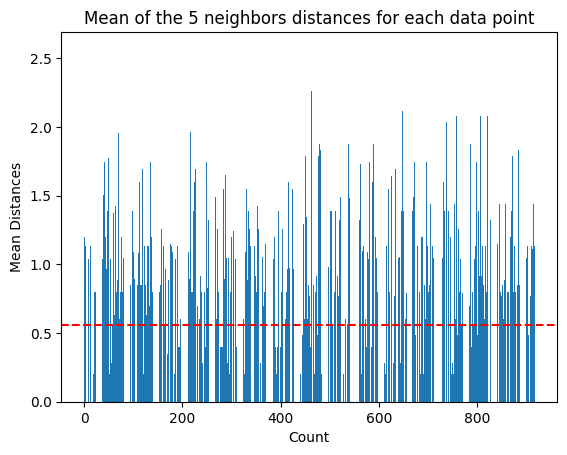

In [194]:
# calculate the mean of the 5 distances and plot a graph that counts
# each row on the X-axis and displays each mean distance on the Y-axis...
dist_means = distances.mean(axis=1)
plt.bar(np.array(range(0, len(y_train))), dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

plt.axhline(y = 0.56, color = 'r', linestyle = '--')

In [195]:
# Visually determine cutoff values > 0.56
outlier_index = np.where(dist_means > 0.56)
outlier_index

(array([  0,   1,   2,   3,   4,   6,   9,  10,  13,  14,  16,  21,  23,
         24,  25,  27,  28,  30,  33,  34,  36,  37,  38,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  53,  54,  55,  58,  60,
         61,  62,  64,  65,  66,  67,  68,  69,  70,  72,  74,  76,  77,
         78,  79,  80,  81,  84,  87,  88,  91,  92,  93,  94,  95,  99,
        101, 102, 103, 104, 106, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 119, 123, 124, 125, 127, 128, 129, 130, 131, 133, 134, 135,
        136, 137, 138, 139, 141, 142, 145, 147, 151, 154, 155, 156, 157,
        158, 161, 162, 163, 164, 165, 166, 167, 169, 171, 172, 173, 175,
        176, 177, 178, 179, 180, 181, 183, 186, 190, 195, 196, 197, 201,
        202, 205, 206, 208, 209, 210, 212, 213, 215, 216, 217, 218, 219,
        220, 221, 223, 225, 226, 227, 228, 231, 234, 235, 237, 238, 239,
        240, 244, 245, 246, 249, 251, 252, 253, 254, 255, 256, 257, 258,
        259, 260, 261, 262, 263, 265, 266, 267, 268

In [196]:
# Filter outlier values (locate them in the dataframe)...
outlier_values = df.iloc[outlier_index]
outlier_values

,job,work_type,analytics,photoshop,sql server,tableau,administrative skills,troubleshooting,data science,python,...,itil,seo,interior design,economics,3d modeling,sales,research,databases,pharmaceutical industry,content creation
1,Data Engineer,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,Data Engineer,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,Data Engineer,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Data Engineer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,Database Developer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Senior ReactJS Developer,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2229,Lead Java Developer,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2232,Data Analyst,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2235,C Developer,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# ***Decision Tree***

In [197]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# y_pred

In [198]:
y_pred2 = clf.predict(X_test2)
y_pred2

array(['Python Developer'], dtype=object)

In [199]:
#tree.plot_tree(clf)

In [200]:
#plt.figure(figsize=(10,10)) # For example, (6, 10) represents a figure size of 6 inches in width and 10 inches in height.
#tree.plot_tree(clf, rounded=True, filled=True, feature_names=X.columns)

In [201]:
x_updated=X.columns.tolist() # Convert x.columns to a list of strings
text_rep=tree.export_text(clf, feature_names=x_updated) # Export the decision tree as text representation
print(text_rep)

|--- java <= 0.50
|   |--- work_type <= 1.50
|   |   |--- aws <= 0.50
|   |   |   |--- analytics <= 0.50
|   |   |   |   |--- audit <= 0.50
|   |   |   |   |   |--- hadoop <= 0.50
|   |   |   |   |   |   |--- python <= 0.50
|   |   |   |   |   |   |   |--- sql <= 0.50
|   |   |   |   |   |   |   |   |--- css <= 0.50
|   |   |   |   |   |   |   |   |   |--- legal <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- communication <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 18
|   |   |   |   |   |   |   |   |   |   |--- communication >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |--- legal >  0.50
|   |   |   |   |   |   |   |   |   |   |--- compliance <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Business Analyst
|   |   |   |   |   |   |   |   |   |   |--- compliance >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Business Analyst
|   |   

In [202]:
# Evaluating DT for Classification...
acc =  clf.score(X_test, y_test)
print(acc)

0.565359477124183


In [203]:
dt_acc = accuracy_score(y_test, y_pred)
print("DT accuracy:", dt_acc)
dt_accuracy = cross_val_score(clf,X_test,y_test,scoring='accuracy')
print("Cross-Validation Accuracy:", dt_accuracy.mean())
prv = precision_score(y_test,y_pred,average='weighted')
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average='weighted')
print("F1 Score:", f1v)

names.append('DT')
scores.append(dt_acc)
cross_scores.append(dt_accuracy.mean())
pr.append(prv)
f1.append(f1v)

DT accuracy: 0.565359477124183
Cross-Validation Accuracy: 0.2875198307773664
Precision: 0.5807379162900318
F1 Score: 0.5420338768536848


In [204]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                                             precision    recall  f1-score   support

                 .NET Development Team Lead       1.00      1.00      1.00         1
                              AEM Developer       1.00      1.00      1.00         1
                          AWS Data Engineer       0.00      0.00      0.00         2
                Associate Software Engineer       0.50      1.00      0.67         1
                Automated Testing Team Lead       1.00      1.00      1.00         1
                        Azure Data Engineer       0.29      0.80      0.42         5
                         Back End Developer       0.00      0.00      0.00         1
                         Big Data Developer       1.00      0.25      0.40         4
                       Blockchain Developer       1.00      0.33      0.50         3
                  Blockchain Developer- WFH       0.50      1.00      0.67         1
                           Business Analyst       0.21      0.27

# ***Logistic Regression***

In [205]:
lr = LogisticRegression()
lr_clf = lr.fit(X_train,y_train)
y_pred=lr_clf.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred)
print("LR accuracy:", lr_acc)
lr_accuracy = cross_val_score(lr_clf,X_test,y_test,scoring='accuracy')
print("Cross-Validation Accuracy:", lr_accuracy.mean())
prv = precision_score(y_test,y_pred,average='weighted')
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average='weighted')
print("F1 Score:", f1v)

names.append('LR')
scores.append(lr_acc)
cross_scores.append(lr_accuracy.mean())
pr.append(prv)
f1.append(f1v)

LR accuracy: 0.4411764705882353
Cross-Validation Accuracy: 0.31041776837652035
Precision: 0.3859082947894943
F1 Score: 0.3887972456770906


In [206]:
y_pred2 = lr_clf.predict(X_test2)
y_pred2

array(['Python Developer'], dtype=object)

In [207]:
# Evaluating LR for Classification...
acc =  lr_clf.score(X_test, y_test)
print(acc)

0.4411764705882353


In [208]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                                             precision    recall  f1-score   support

                 .NET Development Team Lead       0.00      0.00      0.00         1
                              AEM Developer       0.00      0.00      0.00         1
                          AWS Data Engineer       0.00      0.00      0.00         2
                Associate Software Engineer       1.00      1.00      1.00         1
                Automated Testing Team Lead       1.00      1.00      1.00         1
                        Azure Data Engineer       1.00      0.20      0.33         5
                         Back End Developer       0.00      0.00      0.00         1
                         Big Data Developer       1.00      0.75      0.86         4
                       Blockchain Developer       0.00      0.00      0.00         3
                  Blockchain Developer- WFH       1.00      1.00      1.00         1
                           Business Analyst       0.22      0.53

# ***Random Forest***

In [209]:
rmf = RandomForestClassifier()
rmf_clf = rmf.fit(X_train,y_train)
y_pred=rmf_clf.predict(X_test)

rmf_clf_acc = accuracy_score(y_test, y_pred)
print("RMF accuracy:", rmf_clf_acc)
rmf_clf_acc2 = cross_val_score(rmf_clf,X_train,y_train,scoring="accuracy")
print("Cross-Validation Accuracy:", rmf_clf_acc2.mean())
prv = precision_score(y_test,y_pred,average='weighted')
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average='weighted')
print("F1 Score:", f1v)

names.append('RF')
scores.append(rmf_clf_acc)
cross_scores.append(rmf_clf_acc2.mean())
pr.append(prv)
f1.append(f1v)

RMF accuracy: 0.5784313725490197
Cross-Validation Accuracy: 0.5490258968876217
Precision: 0.5745474894407997
F1 Score: 0.5523050193150247


In [210]:
y_pred2 = rmf_clf.predict(X_test2)
y_pred2

array(['Python Developer'], dtype=object)

In [211]:
# Evaluating RMF for Classification...
acc =  rmf_clf.score(X_test, y_test)
print(acc)

0.5784313725490197


In [212]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                                             precision    recall  f1-score   support

                 .NET Development Team Lead       1.00      1.00      1.00         1
                              AEM Developer       0.50      1.00      0.67         1
                          AWS Data Engineer       0.00      0.00      0.00         2
                Associate Software Engineer       0.50      1.00      0.67         1
                Automated Testing Team Lead       1.00      1.00      1.00         1
                        Azure Data Engineer       0.67      0.80      0.73         5
                         Back End Developer       0.00      0.00      0.00         1
                         Big Data Developer       1.00      0.75      0.86         4
                       Blockchain Developer       0.50      0.33      0.40         3
                  Blockchain Developer- WFH       1.00      1.00      1.00         1
                           Business Analyst       0.54      0.47

# ***SVM RBF Kernel***

In [213]:
# Creating an SVM classifier with RBF kernel
rbf_svm = svm.SVC(kernel='rbf')
# Training the model
rbf_svm.fit(X_train, y_train)
# Making predictions on the test data
y_pred = rbf_svm.predict(X_test)

# Calculating the accuracy of the SVM model
rbf_svm_acc = accuracy_score(y_test, y_pred)
print("SVM RBF Kernel accuracy:", rbf_svm_acc)
rbf_svm_acc2 = cross_val_score(rbf_svm,X_train,y_train,scoring="accuracy")
print("Cross-Validation Accuracy:", rbf_svm_acc2.mean())
prv = precision_score(y_test,y_pred,average="weighted")
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average="weighted")
print("F1 Score:", f1v)

names.append('Rsvm')
scores.append(rbf_svm_acc)
cross_scores.append(rbf_svm_acc2.mean())
pr.append(prv)
f1.append(f1v)

SVM RBF Kernel accuracy: 0.4477124183006536
Cross-Validation Accuracy: 0.4302209550962224
Precision: 0.3818081758131385
F1 Score: 0.38287953229667815


In [214]:
y_pred2 = rbf_svm.predict(X_test2)
y_pred2

array(['Python Developer'], dtype=object)

In [215]:
# Evaluating RMF for Classification...
acc =  rbf_svm.score(X_test, y_test)
print(acc)

0.4477124183006536


In [216]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                                             precision    recall  f1-score   support

                 .NET Development Team Lead       0.00      0.00      0.00         1
                              AEM Developer       0.00      0.00      0.00         1
                          AWS Data Engineer       0.00      0.00      0.00         2
                Associate Software Engineer       1.00      1.00      1.00         1
                Automated Testing Team Lead       0.00      0.00      0.00         1
                        Azure Data Engineer       1.00      0.20      0.33         5
                         Back End Developer       0.00      0.00      0.00         1
                         Big Data Developer       1.00      0.25      0.40         4
                       Blockchain Developer       0.00      0.00      0.00         3
                  Blockchain Developer- WFH       1.00      1.00      1.00         1
                           Business Analyst       0.20      0.60

# ***Multinomial Naive Bayes***

In [217]:
# Create Multinomial Naive Bayes classifier
mnb = MultinomialNB()
# Fit the classifier to the training data
mnb.fit(X_train, y_train)
# Predict on the test set
y_pred = mnb.predict(X_test)

mnb_acc = accuracy_score(y_test, y_pred)
print("MNB accuracy:", mnb_acc)
mnb_acc2 = cross_val_score(mnb,X_train,y_train,scoring="accuracy")
print("Cross-Validation Accuracy:", mnb_acc2.mean())
prv = precision_score(y_test,y_pred,average="weighted")
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average="weighted")
print("F1 Score:", f1v)

names.append('MNB')
scores.append(mnb_acc)
cross_scores.append(mnb_acc2.mean())
pr.append(prv)
f1.append(f1v)

MNB accuracy: 0.24836601307189543
Cross-Validation Accuracy: 0.25708600617723926
Precision: 0.190429221087247
F1 Score: 0.17023534605927493


In [218]:
y_pred2 = mnb.predict(X_test2)
y_pred2

array(['Senior Automation Tester'], dtype='<U43')

In [219]:
# Evaluating RMF for Classification...
acc =  mnb.score(X_test, y_test)
print(acc)

0.24836601307189543


In [220]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                                             precision    recall  f1-score   support

                 .NET Development Team Lead       0.00      0.00      0.00         1
                              AEM Developer       0.00      0.00      0.00         1
                          AWS Data Engineer       0.00      0.00      0.00         2
                Associate Software Engineer       0.00      0.00      0.00         1
                Automated Testing Team Lead       0.00      0.00      0.00         1
                        Azure Data Engineer       0.00      0.00      0.00         5
                         Back End Developer       0.00      0.00      0.00         1
                         Big Data Developer       1.00      0.25      0.40         4
                       Blockchain Developer       0.00      0.00      0.00         3
                  Blockchain Developer- WFH       0.00      0.00      0.00         1
                           Business Analyst       0.37      0.67

# ***Label Encode Y for ANN and LightGBM***

In [221]:
le1 = LabelEncoder()
ann_y_train = le1.fit_transform(y_train)
ann_y_test = le1.transform(y_test)

In [222]:
print( dict(zip(le1.classes_, le1.transform(le1.classes_)))  )

{'.NET Development Team Lead': 0, 'AEM Developer': 1, 'AWS Data Engineer': 2, 'Associate Software Engineer': 3, 'Automated Testing Team Lead': 4, 'Azure Data Engineer': 5, 'Back End Developer': 6, 'Big Data Developer': 7, 'Blockchain Developer': 8, 'Blockchain Developer- WFH': 9, 'Business Analyst': 10, 'Business Development Associate': 11, 'Business Development Executive': 12, 'Business Development Manager': 13, 'C Developer': 14, 'Cloud Data Engineer': 15, 'Cloud Engineer': 16, 'Cloud Software Engineer': 17, 'Data Analyst': 18, 'Data Architect': 19, 'Data Engineer': 20, 'Data Engineer (Azure & Snowflake)': 21, 'Data Scientist': 22, 'Database Developer': 23, 'Developer': 24, 'Development Team Lead': 25, 'Digital Marketing Executive': 26, 'Dotnet Developer': 27, 'Drupal Developer': 28, 'Full Stack Engineer': 29, 'GCP Data Engineer': 30, 'Golang Developer': 31, 'Human Resources Intern': 32, 'Informatica Developer': 33, 'Java Developer': 34, 'Java Development Team Lead': 35, 'Java Team L

# ***ANN***

In [223]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

model = Sequential()
model.add(Dense(units=64, activation=LeakyReLU(alpha=0.01), input_dim=len(skills)+1))
model.add(Dense(units=32, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(units=16, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(units=8, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(units=len(y_train.unique()), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=model.fit(X_train, ann_y_train, epochs=400, batch_size=32)

loss, accuracy = model.evaluate(X_test, ann_y_test)
print(f'Test loss: {loss:.4f}')
print(f"Accuracy: {accuracy * 100:.2f}%")

Epoch 1/400
29/29 [==============================] - 1s 5ms/step - loss: 4.6183 - accuracy: 0.0044
Epoch 2/400
29/29 [==============================] - 0s 5ms/step - loss: 4.5523 - accuracy: 0.0251
Epoch 3/400
29/29 [==============================] - 0s 4ms/step - loss: 4.3840 - accuracy: 0.0654
Epoch 4/400
29/29 [==============================] - 0s 5ms/step - loss: 4.1694 - accuracy: 0.0708
Epoch 5/400
29/29 [==============================] - 0s 4ms/step - loss: 4.0051 - accuracy: 0.1002
Epoch 6/400
29/29 [==============================] - 0s 4ms/step - loss: 3.8602 - accuracy: 0.1383
Epoch 7/400
29/29 [==============================] - 0s 4ms/step - loss: 3.7290 - accuracy: 0.1569
Epoch 8/400
29/29 [==============================] - 0s 4ms/step - loss: 3.6124 - accuracy: 0.1656
Epoch 9/400
29/29 [==============================] - 0s 4ms/step - loss: 3.5106 - accuracy: 0.1830
Epoch 10/400
29/29 [==============================] - 0s 5ms/step - loss: 3.4173 - accuracy: 0.2070
Epoch 11/

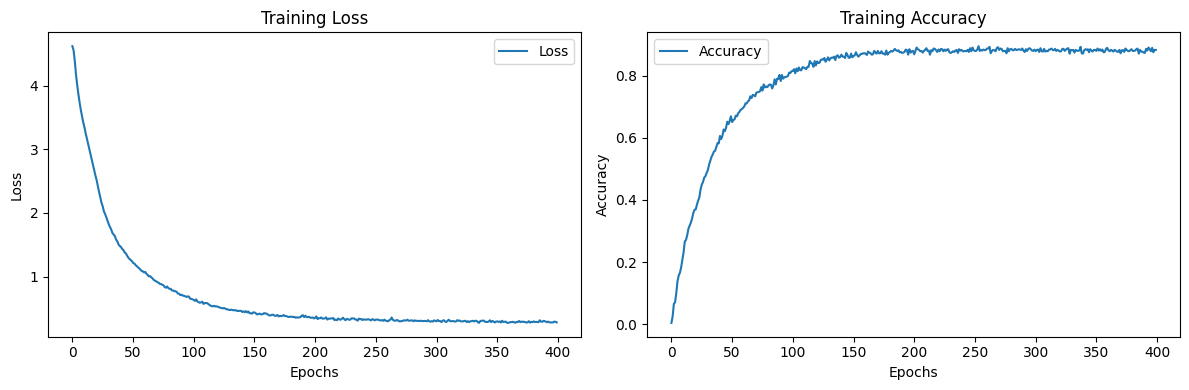

In [224]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()

In [225]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                8320      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 103)               927       
                                                                 
Total params: 11991 (46.84 KB)
Trainable params: 11991 (46.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [226]:
predictions = model.predict(X_test2)
print(predictions[0]) #outputs 398 probability values of the input feature belonging to that class in contrast to other 397 classes

1/1 [==============================] - 0s 77ms/step
[2.08539751e-31 1.01012506e-26 3.98489905e-31 7.26250284e-15
 1.07728485e-25 3.06720450e-16 9.36918312e-08 4.90790308e-33
 1.35388200e-15 6.40779092e-23 0.00000000e+00 6.37960220e-21
 8.52135502e-23 6.33952689e-13 8.84739890e-08 0.00000000e+00
 9.78785455e-12 0.00000000e+00 2.19891632e-16 0.00000000e+00
 1.05669605e-14 0.00000000e+00 2.48615361e-05 0.00000000e+00
 2.05079601e-07 4.67761459e-35 5.97235913e-21 1.37044254e-37
 3.00621992e-21 3.09856207e-09 0.00000000e+00 1.22236712e-20
 1.38835059e-12 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.40237034e-33 8.23831956e-30 8.92682266e-17 1.92412318e-29
 8.84998620e-33 4.79224694e-29 3.81915017e-23 7.62528348e-36
 6.70204519e-32 0.00000000e+00 0.00000000e+00 1.11788495e-07
 0.00000000e+00 1.34842881e-15 6.32883337e-32 0.00000000e+00
 1.81721856e-14 0.00000000e+00 1.99973904e-09 1.98546724e-04
 0.00000000e+00 5.15826825e-20 0.00000000e+00 0.00000000e+00
 9.99764860e-01 0.00000000e+00 5.

In [227]:
for i,val in enumerate(predictions[0]):  #we will consider the class giving the highest probability as our predicted class
    if val==max(predictions[0]):
        print(f"Class {i}")

Class 60


In [228]:
le1.inverse_transform([np.argmax(predictions[0])])

array(['Python Developer'], dtype=object)

In [229]:
pred = model.predict(X_test)
pred

10/10 [==============================] - 0s 2ms/step


array([[2.0853975e-31, 1.0101174e-26, 3.9849291e-31, ..., 2.0078339e-09,
        0.0000000e+00, 1.2787132e-31],
       [6.9401754e-13, 1.5455960e-33, 0.0000000e+00, ..., 5.8591479e-28,
        1.4716648e-11, 0.0000000e+00],
       [1.2476232e-12, 1.8014508e-11, 1.7720198e-38, ..., 7.1882214e-12,
        3.5829841e-21, 0.0000000e+00],
       ...,
       [5.4867087e-05, 1.9000862e-12, 2.5764164e-24, ..., 7.5654583e-03,
        2.3318538e-14, 8.2010343e-22],
       [5.8804478e-25, 0.0000000e+00, 0.0000000e+00, ..., 9.8791992e-18,
        0.0000000e+00, 3.1651213e-09],
       [6.2258012e-25, 2.0496149e-26, 0.0000000e+00, ..., 8.3643405e-20,
        9.1342337e-18, 0.0000000e+00]], dtype=float32)

In [230]:
pred2 = []
for i in range(len(pred)):
  pred2.append(np.argmax(pred[i]))
pred2

[60,
 89,
 10,
 7,
 92,
 78,
 72,
 46,
 38,
 7,
 77,
 20,
 102,
 46,
 80,
 83,
 22,
 53,
 46,
 20,
 62,
 32,
 50,
 66,
 75,
 37,
 73,
 70,
 66,
 52,
 85,
 18,
 44,
 38,
 31,
 4,
 96,
 38,
 35,
 94,
 76,
 70,
 3,
 10,
 82,
 37,
 44,
 11,
 76,
 12,
 39,
 77,
 56,
 50,
 30,
 42,
 74,
 85,
 40,
 43,
 19,
 46,
 47,
 76,
 3,
 3,
 66,
 21,
 45,
 46,
 18,
 92,
 66,
 27,
 56,
 44,
 64,
 31,
 92,
 76,
 22,
 62,
 27,
 32,
 83,
 43,
 18,
 66,
 38,
 30,
 21,
 43,
 87,
 40,
 5,
 46,
 43,
 17,
 38,
 29,
 32,
 44,
 18,
 47,
 20,
 76,
 38,
 30,
 5,
 73,
 36,
 85,
 83,
 56,
 32,
 85,
 20,
 75,
 46,
 29,
 73,
 37,
 78,
 70,
 19,
 43,
 20,
 46,
 18,
 3,
 10,
 18,
 7,
 96,
 50,
 62,
 21,
 30,
 29,
 24,
 78,
 38,
 73,
 1,
 32,
 44,
 16,
 56,
 20,
 18,
 46,
 80,
 21,
 66,
 70,
 87,
 49,
 88,
 70,
 18,
 96,
 10,
 66,
 38,
 56,
 15,
 22,
 33,
 88,
 63,
 38,
 33,
 73,
 20,
 24,
 75,
 73,
 30,
 73,
 11,
 76,
 49,
 78,
 46,
 46,
 62,
 46,
 79,
 15,
 85,
 56,
 60,
 5,
 50,
 77,
 20,
 35,
 79,
 94,
 70,
 50,
 5,
 1

In [231]:
y_pred = pred2

ann_acc = accuracy_score(ann_y_test, y_pred)
print("ANN accuracy:", ann_acc)
# ann_acc2 = cross_val_score(model,X_train,ann_y_train,scoring="accuracy")
print("Cross-Validation Accuracy:", ann_acc)
prv = precision_score(ann_y_test,y_pred,average="weighted")
print("Precision:", prv)
f1v = f1_score(ann_y_test,y_pred,average="weighted")
print("F1 Score:", f1v)

names.append('ANN')
scores.append(ann_acc)
cross_scores.append(ann_acc)
pr.append(prv)
f1.append(f1v)

ANN accuracy: 0.5326797385620915
Cross-Validation Accuracy: 0.5326797385620915
Precision: 0.507886802739744
F1 Score: 0.4962251028304109


# ***LightGBM***

In [232]:
import lightgbm as lgb

#set the training data
train_data = lgb.Dataset(X_train, label=ann_y_train)

# Set parameters for LGBM classifier
params = {'objective': 'multiclass', 'num_classes': len(y_train.unique()), 'random_state': 42, 'learning_rate': 0.1, 'num_iterations': 1000}

#Create and Train an LGBM classifier
lgb_classifier = lgb.train(params, train_data)

# Predict on test set and evaluate accuracy
y_pred_lgb = lgb_classifier.predict(X_test)
y_pred_lgb

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

array([[1.87731237e-07, 2.48888253e-07, 1.52057617e-08, ...,
        8.60311536e-08, 1.24325473e-08, 8.15540877e-10],
       [9.00174992e-10, 5.72181631e-09, 1.48899323e-11, ...,
        1.23079784e-09, 5.56255783e-12, 1.35394383e-10],
       [8.27177437e-06, 3.98303675e-05, 1.76200448e-07, ...,
        4.30508663e-05, 1.24185646e-07, 3.49050836e-07],
       ...,
       [6.02481060e-08, 6.68902806e-04, 8.74763446e-07, ...,
        4.44028083e-04, 8.71785964e-07, 1.01596862e-07],
       [1.21743091e-09, 1.25675193e-08, 2.75246083e-10, ...,
        4.83576658e-09, 2.18278169e-09, 8.30138710e-09],
       [1.53424437e-10, 1.27781852e-06, 3.20219219e-09, ...,
        2.05290004e-07, 2.27651489e-09, 1.76618121e-08]])

In [233]:
# y_pred_lgb_bin = [1 if x > 0.5 else 0 for x in y_pred_lgb]
pred2 = []
for i in range(len(y_pred_lgb)):
  pred2.append(np.argmax(y_pred_lgb[i]))
y_pred_lgb_bin = pred2

In [234]:
accuracy_lgb = accuracy_score(ann_y_test, y_pred_lgb_bin)
print("Accuracy of LGBM Classifier:",accuracy_lgb)
# accuracy_lgb2 = cross_val_score(lgb_classifier,X_train,ann_y_train,scoring="accuracy")
print("Cross-Validation Accuracy:", accuracy_lgb)
prv = precision_score(ann_y_test,y_pred_lgb_bin,average="weighted")
print("Precision:", prv)
f1v = f1_score(ann_y_test,y_pred_lgb_bin,average="weighted")
print("F1 Score:", f1v)

names.append('LGB')
scores.append(accuracy_lgb)
cross_scores.append(accuracy_lgb)
pr.append(prv)
f1.append(f1v)

Accuracy of LGBM Classifier: 0.5555555555555556
Cross-Validation Accuracy: 0.5555555555555556
Precision: 0.5462973482581326
F1 Score: 0.5274684636276332


# ***Comparing model performances***

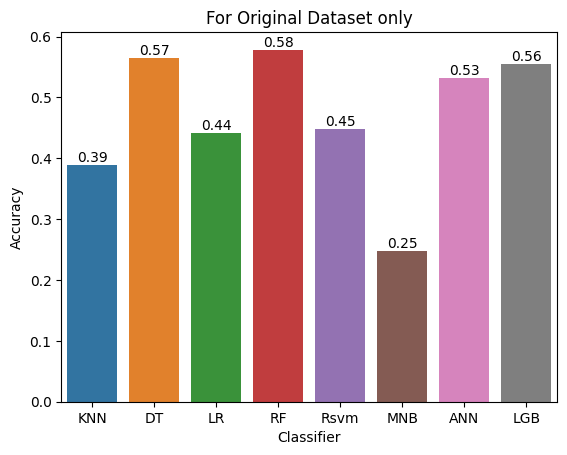

In [235]:
axis = sns.barplot(x = 'Name', y = 'Score', data = pd.DataFrame({'Name': names, 'Score': scores}) )
axis.set(title='For Original Dataset only',xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.2f}'.format(height), ha="center")

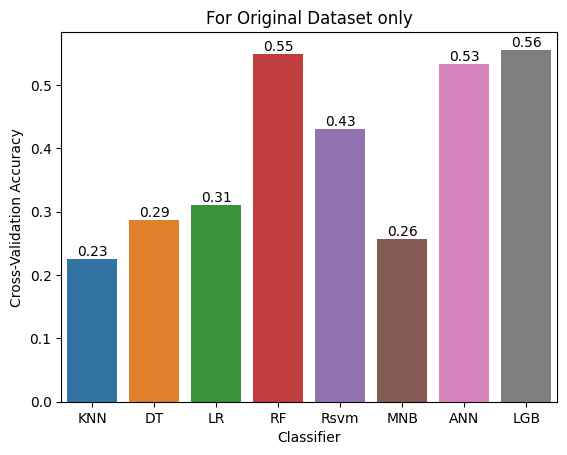

In [236]:
axis = sns.barplot(x = 'Name', y = 'Score', data = pd.DataFrame({'Name': names, 'Score': cross_scores}) )
axis.set(title='For Original Dataset only',xlabel='Classifier', ylabel='Cross-Validation Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.2f}'.format(height), ha="center")

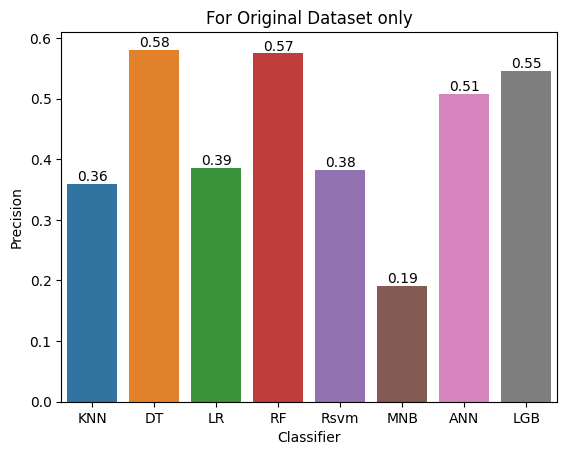

In [237]:
axis = sns.barplot(x = 'Name', y = 'Score', data = pd.DataFrame({'Name': names, 'Score': pr}) )
axis.set(title='For Original Dataset only',xlabel='Classifier', ylabel='Precision')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.2f}'.format(height), ha="center")

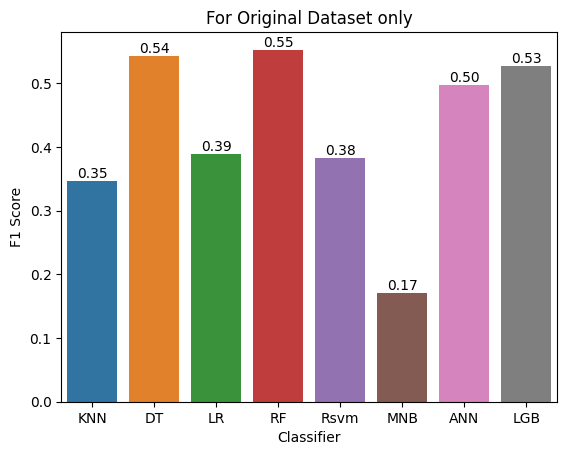

In [238]:
axis = sns.barplot(x = 'Name', y = 'Score', data = pd.DataFrame({'Name': names, 'Score': f1}) )
axis.set(title='For Original Dataset only',xlabel='Classifier', ylabel='F1 Score')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.2f}'.format(height), ha="center")

# ***Downloading PKL Files***

In [239]:
# with open('le.pkl', 'wb') as file:
#     pickle.dump(le, file)
# files.download("le.pkl")

In [240]:
# with open('ML_model.pkl', 'wb') as file:
#     pickle.dump(rmf_clf, file)
# files.download("ML_model.pkl")

In [241]:
# If ANN is chosen
# with open('le1.pkl', 'wb') as file:
#     pickle.dump(le1, file)
# files.download("le1.pkl")

# ***PLAY SOUND ONCE ALL THE CODES ARE EXECUTED***

In [242]:
from IPython.display import HTML
# Display the HTML element
display(HTML(f"""<audio controls autoplay loop><source src='http://codeskulptor-demos.commondatastorage.googleapis.com/descent/gotitem.mp3' type="audio/mpeg"></audio>"""))